# For the 'CIFAR10 small image classification' data from the Keras library, propose and implement a division of this data into training and test sets.
Dla danych “CIFAR10 small image classification” z biblioteki Keras zaproponuj i zrealizuj podział tych danych na dane treningowe i dane testowe,

https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

# Load CIFAR10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Selected classes (e.g. class 0 and 1)
num_rows = y_train.shape[0]
print("Number of rows in y_train:", num_rows) # It has a shape of (50000, 1), where 50000 is the number of samples, and 1 is the number of columns, in this case it's a one-dimensional array.
classes = [0, 1]

# Retain only selected classes
# y_train is an array containing labels for the training images. It has a shape of (50000, 1), which means we have 50,000 labels for the training images.
train_mask = np.isin(y_train[:, 0], classes) # all rows (':') for the first dimension (rows) and only the element with index 0 for the second dimension (columns)
test_mask = np.isin(y_test[:, 0], classes) # first we get the labels
X_train, y_train = X_train[train_mask], y_train[train_mask][:, 0] # then for those labels we select only the element with index 0 ([:, 0]).
X_test, y_test = X_test[test_mask], y_test[test_mask][:, 0]

# Normalize data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to categorical values
num_classes = len(classes)
y_train_full = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Print dimensions of each set
print("Dimensions of the training set: ", X_train.shape)
print("Dimensions of the test set: ", X_test.shape)

# Image dimensions - 32 pixels in height, 32 pixels in width, and 3 channels (R, G, B)
X_train.shape[1:]

Number of rows in y_train: 50000
Dimensions of the training set:  (10000, 32, 32, 3)
Dimensions of the test set:  (2000, 32, 32, 3)


(32, 32, 3)

# Based on a convolutional neural network, as per the instructor's indications, propose a classifier that classifies two out of ten classes
W oparciu o sieć konwolucyjną, zgodnie z wskazaniami prowadzącego, zaproponuj klasyfikator, klasyfikujący dwie z dziesięciu klas

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

# Creating the model of the convolutional neural network
model = Sequential()
# Adding the first convolutional layer with 32 filters, using 3x3 kernels, 'relu' activation function and 'same' padding
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:])) # X_train.shape[1:] are the dimensions of the images (32, 32, 3) height width RGB
# Adding the first max pooling layer with 2x2 pool size
model.add(MaxPooling2D((2, 2)))
# Adding the second convolutional layer with 64 filters
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) # 64 indicates the filters
# Adding the second max pooling layer with 2x2 pool size
model.add(MaxPooling2D((2, 2)))
# Flattening the tensor output from the previous layer to fit the upcoming Dense layer
model.add(Flatten())
# Adding a dense layer with 64 units and 'relu' activation function
model.add(Dense(64, activation='relu'))
# Adding a dense layer with 2 units (for 2 classes) and 'sigmoid' activation function
model.add(Dense(2, activation='sigmoid'))  # changing the number of output units and activation function

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # changing the loss function

# Training the model
history = model.fit(X_train, y_train_full, epochs=10, batch_size=64, validation_split=0.2)

# Evaluating the model on the test data
loss, acc = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", acc)

Metal device set to: Apple M2


2023-05-14 20:52:46.558058: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-14 20:52:46.558706: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-05-14 20:52:46.852255: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-14 20:52:47.049033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


124/125 [============================>.] - ETA: 0s - loss: 0.4717 - accuracy: 0.7651

2023-05-14 20:52:48.640488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 2s 13ms/step - loss: 0.4704 - accuracy: 0.7659 - val_loss: 0.3391 - val_accuracy: 0.8570
Epoch 2/10
125/125 [==============================] - 1s 10ms/step - loss: 0.3117 - accuracy: 0.8678 - val_loss: 0.2776 - val_accuracy: 0.8850
Epoch 3/10
125/125 [==============================] - 1s 11ms/step - loss: 0.2442 - accuracy: 0.9020 - val_loss: 0.2262 - val_accuracy: 0.9100
Epoch 4/10
125/125 [==============================] - 1s 11ms/step - loss: 0.2036 - accuracy: 0.9211 - val_loss: 0.1870 - val_accuracy: 0.9230
Epoch 5/10
125/125 [==============================] - 1s 10ms/step - loss: 0.1720 - accuracy: 0.9309 - val_loss: 0.1652 - val_accuracy: 0.9360
Epoch 6/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1522 - accuracy: 0.9384 - val_loss: 0.1571 - val_accuracy: 0.9350
Epoch 7/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1385 - accuracy: 0.9479 - val_loss: 0.1735 - val_accuracy: 0.9340
Epoch 8/10

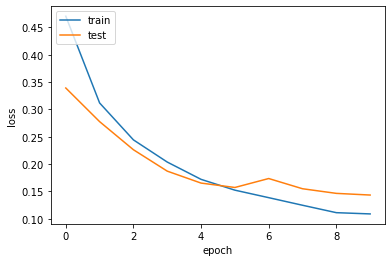

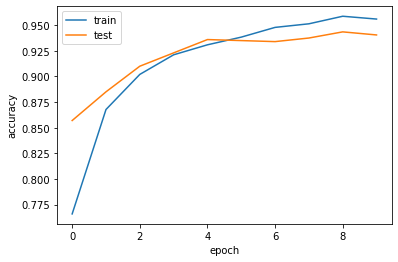

In [3]:
# Plot the training and validation loss per epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot the training and validation accuracy per epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Propose a classifier with one, two, and three convolutional layers.
Zaproponuj klasyfikator z jedną, dwiema oraz trzema warstwami konwolucyjnymi,

In [9]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Flatten())
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(num_classes, activation='softmax'))

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_1 = model_1.fit(X_train, y_train_full, epochs=10, batch_size=64, validation_split=0.2)

test_loss_1, test_acc_1 = model_1.evaluate(X_test, y_test, verbose=2)
print("Model 1 - Test accuracy: ", test_acc_1)
print("Model 1 - Test loss: ", test_loss_1)


model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dense(num_classes, activation='softmax'))

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train_full, epochs=10, batch_size=64, validation_split=0.2)

test_loss_2, test_acc_2 = model_2.evaluate(X_test, y_test, verbose=2)
print("Model 2 - Test accuracy: ", test_acc_2)
print("Model 2 - Test loss: ", test_loss_2)


model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=X_train.shape[1:]))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_3.add(MaxPooling2D((2, 2)))
model_3.add(Flatten())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(num_classes, activation='softmax'))

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_3 = model_3.fit(X_train, y_train_full, epochs=10, batch_size=64, validation_split=0.2)

test_loss_3, test_acc_3 = model_3.evaluate(X_test, y_test, verbose=2)
print("Model 3 - Test accuracy: ", test_acc_3)
print("Model 3 - Test loss: ", test_loss_3)

Epoch 1/10
  5/125 [>.............................] - ETA: 1s - loss: 0.9045 - accuracy: 0.5281 

2023-04-30 19:18:37.443646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - ETA: 0s - loss: 0.4702 - accuracy: 0.7843

2023-04-30 19:18:38.826293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 2s 12ms/step - loss: 0.4702 - accuracy: 0.7843 - val_loss: 0.3287 - val_accuracy: 0.8695
Epoch 2/10
125/125 [==============================] - 1s 11ms/step - loss: 0.3188 - accuracy: 0.8641 - val_loss: 0.2789 - val_accuracy: 0.8895
Epoch 3/10
125/125 [==============================] - 1s 11ms/step - loss: 0.2651 - accuracy: 0.8884 - val_loss: 0.2566 - val_accuracy: 0.8940
Epoch 4/10
125/125 [==============================] - 1s 11ms/step - loss: 0.2324 - accuracy: 0.9053 - val_loss: 0.2189 - val_accuracy: 0.9120
Epoch 5/10
125/125 [==============================] - 1s 10ms/step - loss: 0.2062 - accuracy: 0.9168 - val_loss: 0.2174 - val_accuracy: 0.9120
Epoch 6/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1805 - accuracy: 0.9296 - val_loss: 0.1925 - val_accuracy: 0.9235
Epoch 7/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1635 - accuracy: 0.9334 - val_loss: 0.1840 - val_accuracy: 0.9235
Epoch 8/10

2023-04-30 19:18:51.856120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


123/125 [============================>.] - ETA: 0s - loss: 0.4397 - accuracy: 0.7895

2023-04-30 19:18:53.535367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 2s 15ms/step - loss: 0.4375 - accuracy: 0.7908 - val_loss: 0.2915 - val_accuracy: 0.8720
Epoch 2/10
125/125 [==============================] - 2s 13ms/step - loss: 0.2610 - accuracy: 0.8933 - val_loss: 0.2177 - val_accuracy: 0.9130
Epoch 3/10
125/125 [==============================] - 2s 14ms/step - loss: 0.2048 - accuracy: 0.9193 - val_loss: 0.1885 - val_accuracy: 0.9250
Epoch 4/10
125/125 [==============================] - 2s 14ms/step - loss: 0.1688 - accuracy: 0.9338 - val_loss: 0.1873 - val_accuracy: 0.9260
Epoch 5/10
125/125 [==============================] - 2s 14ms/step - loss: 0.1451 - accuracy: 0.9474 - val_loss: 0.1582 - val_accuracy: 0.9345
Epoch 6/10
125/125 [==============================] - 2s 13ms/step - loss: 0.1274 - accuracy: 0.9495 - val_loss: 0.1499 - val_accuracy: 0.9440
Epoch 7/10
125/125 [==============================] - 2s 13ms/step - loss: 0.1136 - accuracy: 0.9565 - val_loss: 0.1544 - val_accuracy: 0.9380
Epoch 8/10

2023-04-30 19:19:09.473126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


123/125 [============================>.] - ETA: 0s - loss: 0.4191 - accuracy: 0.7992

2023-04-30 19:19:11.504294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


125/125 [==============================] - 2s 17ms/step - loss: 0.4172 - accuracy: 0.8003 - val_loss: 0.2901 - val_accuracy: 0.8815
Epoch 2/10
125/125 [==============================] - 2s 16ms/step - loss: 0.2320 - accuracy: 0.9054 - val_loss: 0.1859 - val_accuracy: 0.9280
Epoch 3/10
125/125 [==============================] - 2s 16ms/step - loss: 0.1685 - accuracy: 0.9326 - val_loss: 0.1526 - val_accuracy: 0.9370
Epoch 4/10
125/125 [==============================] - 2s 16ms/step - loss: 0.1391 - accuracy: 0.9465 - val_loss: 0.1696 - val_accuracy: 0.9280
Epoch 5/10
125/125 [==============================] - 2s 16ms/step - loss: 0.1122 - accuracy: 0.9581 - val_loss: 0.1274 - val_accuracy: 0.9495
Epoch 6/10
125/125 [==============================] - 2s 15ms/step - loss: 0.0840 - accuracy: 0.9664 - val_loss: 0.1494 - val_accuracy: 0.9480
Epoch 7/10
125/125 [==============================] - 2s 16ms/step - loss: 0.0692 - accuracy: 0.9718 - val_loss: 0.1202 - val_accuracy: 0.9590
Epoch 8/10

# Compare the results
Porównaj wyniki z poprzedniego punktu

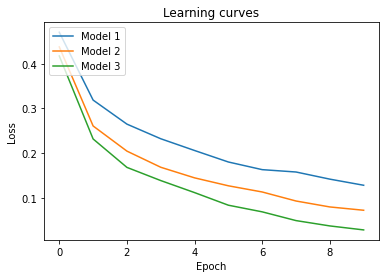

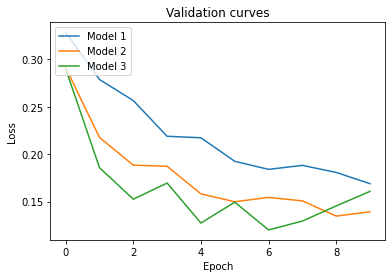

In [11]:
# Creating a plot for the learning curves
plt.plot(history_1.history['loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_3.history['loss'])
plt.title('Learning curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model 1', 'Model 2', 'Model 3'], loc='upper left')
plt.show()

# Creating a plot for the validation curves
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Validation curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model 1', 'Model 2', 'Model 3'], loc='upper left')
plt.show()